## Задание 3.1
### Бинарные изображения, основные характеристики бинарных изображений
<font size="4">Вычислить площадь s, периметр р, ширину w, высоту h, отношение ширины к высоте w/h, отношение площади изображения к площади описывающего прямоугольника s/(wh), эквивалентный диаметр, центр масс, моменты бинарного изображения.

(-0.5, 578.5, 499.5, -0.5)

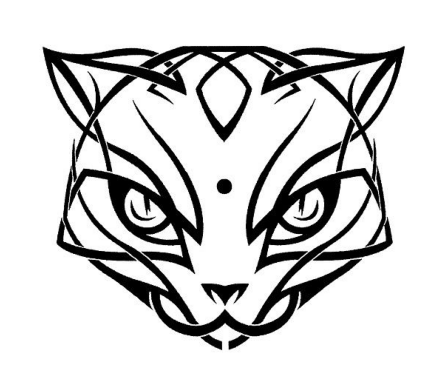

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('uglcat.jpg',0)
imag = cv2.imread('uglcat.jpg',0)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")

(-0.5, 578.5, 499.5, -0.5)

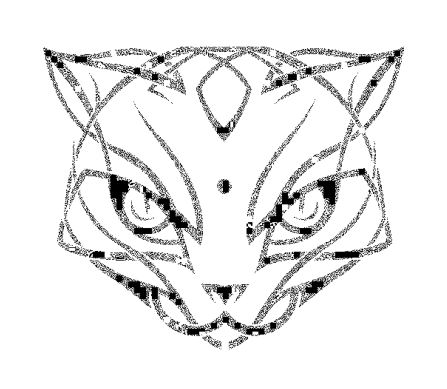

In [7]:
ret, thresh = cv2.threshold(img, 0, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 5, 5)
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.axis("off")

In [11]:
# Создание контура
cnt = contours[0]

# Вычисление площади
s = cv2.contourArea(cnt)

# Вычисление периметра
p = cv2.arcLength(cnt, True)

# Вычисление моментов
M = cv2.moments(cnt)
x, y, w, h = cv2.boundingRect(cnt)

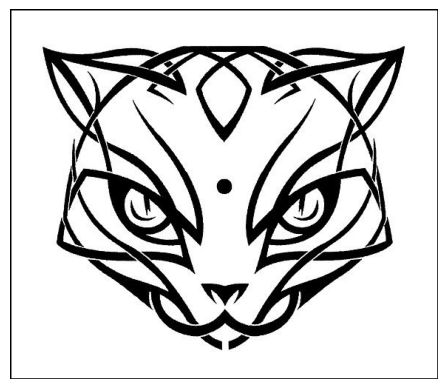

In [12]:
imag = cv2.rectangle(imag, (x, y), (x+w, y+h), (0, 255, 0), 2) #Рамка

plt.imshow(cv2.cvtColor(imag, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [19]:
asprat_ratio = float(w) / h # соотношение сторон
rectar = w * h
s_ratio = float(asprat_ratio) / rectar
eqdiam = np.sqrt(4*ar / np.pi)

In [20]:
print("Площадь s: ", s)
print("Периметр p: ", p)
print("Моменты M: ", M)
print("x, y, w, h: ", x, y, w, h)
print(f"Ширина w: {w}, Высота h: {h}")
print(f"Отношение ширины к высоте w/h: {asprat_ratio}")
print("Отношение s/(wh): ", s_ratio)
print("Эквивалентный диаметр: ", eqdiam)

Площадь s:  288422.0
Периметр p:  2154.0
Моменты M:  {'m00': 288422.0, 'm10': 83353958.0, 'm01': 71961289.0, 'm20': 32119058482.666664, 'm11': 20796812521.0, 'm02': 23939122140.666664, 'm30': 13923611852236.0, 'm21': 8013705091425.333, 'm12': 6918406298652.667, 'm03': 8959216461144.5, 'mu20': 8029764620.666664, 'mu11': 0.0, 'mu02': 5984780535.166664, 'mu30': 0.001953125, 'mu21': 0.000244140625, 'mu12': 0.0009765625, 'mu03': 0.001953125, 'nu20': 0.0965263861055444, 'nu11': 0.0, 'nu02': 0.07194348327566319, 'nu30': 4.3717878515968005e-17, 'nu21': 5.4647348144960006e-18, 'nu12': 2.1858939257984002e-17, 'nu03': 4.3717878515968005e-17}
x, y, w, h:  0 0 579 500
Ширина w: 579, Высота h: 500
Отношение ширины к высоте w/h: 1.158
Отношение s/(wh):  4e-06
Эквивалентный диаметр:  1.2142534302209398


## Задание 3.2
<font size="4">Используя изображение маски определить крайние точки, минимальное и максимальное значения и их координаты для бинарного изображения. Найти среднюю интенсивность изображения в градациях серого, ориентацию бинарного изображения с выделенной осью.

(-0.5, 578.5, 499.5, -0.5)

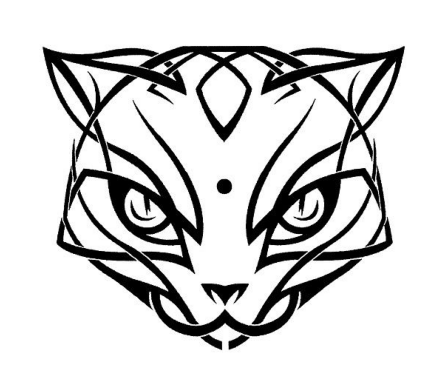

In [22]:
img = cv2.imread('uglcat.jpg', 0)

ret, thresh = cv2.threshold(img, 0, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 5, 5)
cnt = contours[0]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")

In [25]:
mask = np.zeros(img.shape, np.uint8)

cv2.drawContours(mask, [cnt], 0, 255, -1)
pixpoin = np.transpose(np.nonzero(mask))
minv, maxv, minl, maxl = cv2.minMaxLoc(img, mask=mask)
# Крайние точки
leftmost = tuple(cnt[cnt[:, :, 0].argmin()][0])
rightmost = tuple(cnt[cnt[:, :, 0].argmax()][0])
topmost = tuple(cnt[cnt[:, :, 1].argmin()][0])
bottommost = tuple(cnt[cnt[:, :, 1].argmax()][0])
(x,y),(MA,ma),ang=cv2.fitEllipse(cnt)
meanv = cv2.mean(img,mask = mask)
print(f"Пиксельные точки:\n {pixpoin}")
print(f"Максимальное и минимальное значения и их координаты: {minv}, {maxv}, {minl}, {maxl}")
print(f"Крайние точки: {leftmost}, {rightmost}, {topmost}, {bottommost}")
print(f"Средняя интенсивность: {meanv}")
print(f"Ориентация: {ang}")

Пиксельные точки:
 [[  0   0]
 [  0   1]
 [  0   2]
 ...
 [499 576]
 [499 577]
 [499 578]]
Максимальное и минимальное значения и их координаты: 0.0, 255.0, (322, 50), (0, 0)
Крайние точки: (0, 0), (578, 0), (0, 0), (578, 499)
Средняя интенсивность: (206.51307426597583, 0.0, 0.0, 0.0)
Ориентация: 180.0
